In [4]:
!pip install git+https://github.com/bolozna/Multilayer-networks-library
!pip install networkx[default]

  Cloning https://github.com/bolozna/Multilayer-networks-library to /tmp/pip-req-build-xzee1dhz
  Running command git clone --filter=blob:none --quiet https://github.com/bolozna/Multilayer-networks-library /tmp/pip-req-build-xzee1dhz
  Resolved https://github.com/bolozna/Multilayer-networks-library to commit 0a54d5dc8b0d6281c940043a5dcaed1df59a23e2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


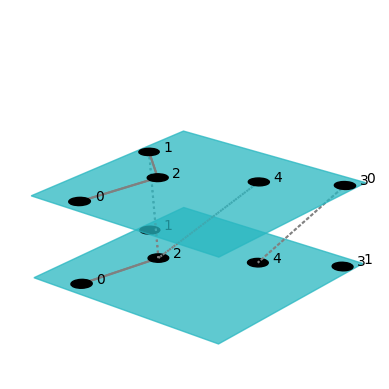

In [5]:
from pymnet import *
import matplotlib
net = models.er_multilayer(5,2,0.2)
fig = draw(net)

In [6]:
import pandas as pd

# Load the uploaded CSV file
file_path = './Assignment_1_Data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

# Clean the column names for easier processing
data.columns = ['Student Name', 'Data Mining', 'Python/R', 'Graphs/Statistics']

# Replace "Yes" with 1 and "No" with 0 for numerical representation
data_numeric = data.replace({'Yes': 1, 'No': 0})

data_numeric.head()


<ipython-input-6-a74f95b84bfa>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_numeric = data.replace({'Yes': 1, 'No': 0})


,Student Name,Data Mining,Python/R,Graphs/Statistics
0,Student 1,0,1,1
1,Student 2,1,1,1
2,Student 3,0,1,0
3,Student 4,1,1,1
4,Student 5,1,1,1


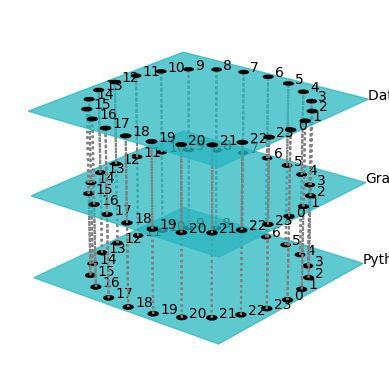

In [7]:
# Create a multilayer network
net = MultiplexNetwork(couplings="categorical", fullyInterconnected=False)

# Define students and relationships for each layer
layers = ["Data Mining", "Python/R", "Graphs/Statistics"]

# Add students to each layer
for i in range(24):
  for layer in layers:
        net.add_node(i, layer)

# Draw the network
fig = draw(net, layout="circular")

In [8]:
# Add edges
for i in range(24):
  for j in range(i+1,24):
    if data_numeric['Data Mining'][i] == 1 and data_numeric['Data Mining'][j] == 1:
      net[i,j,'Data Mining'] = 1

for i in range(24):
  for j in range(i+1,24):
    if data_numeric["Python/R"][i] == 1 and data_numeric["Python/R"][j] == 1:
      net[i,j,"Python/R"] = 1

for i in range(24):
  for j in range(i+1,24):
    if data_numeric["Graphs/Statistics"][i] == 1 and data_numeric["Graphs/Statistics"][j] == 1:
      net[i,j,"Graphs/Statistics"] = 1

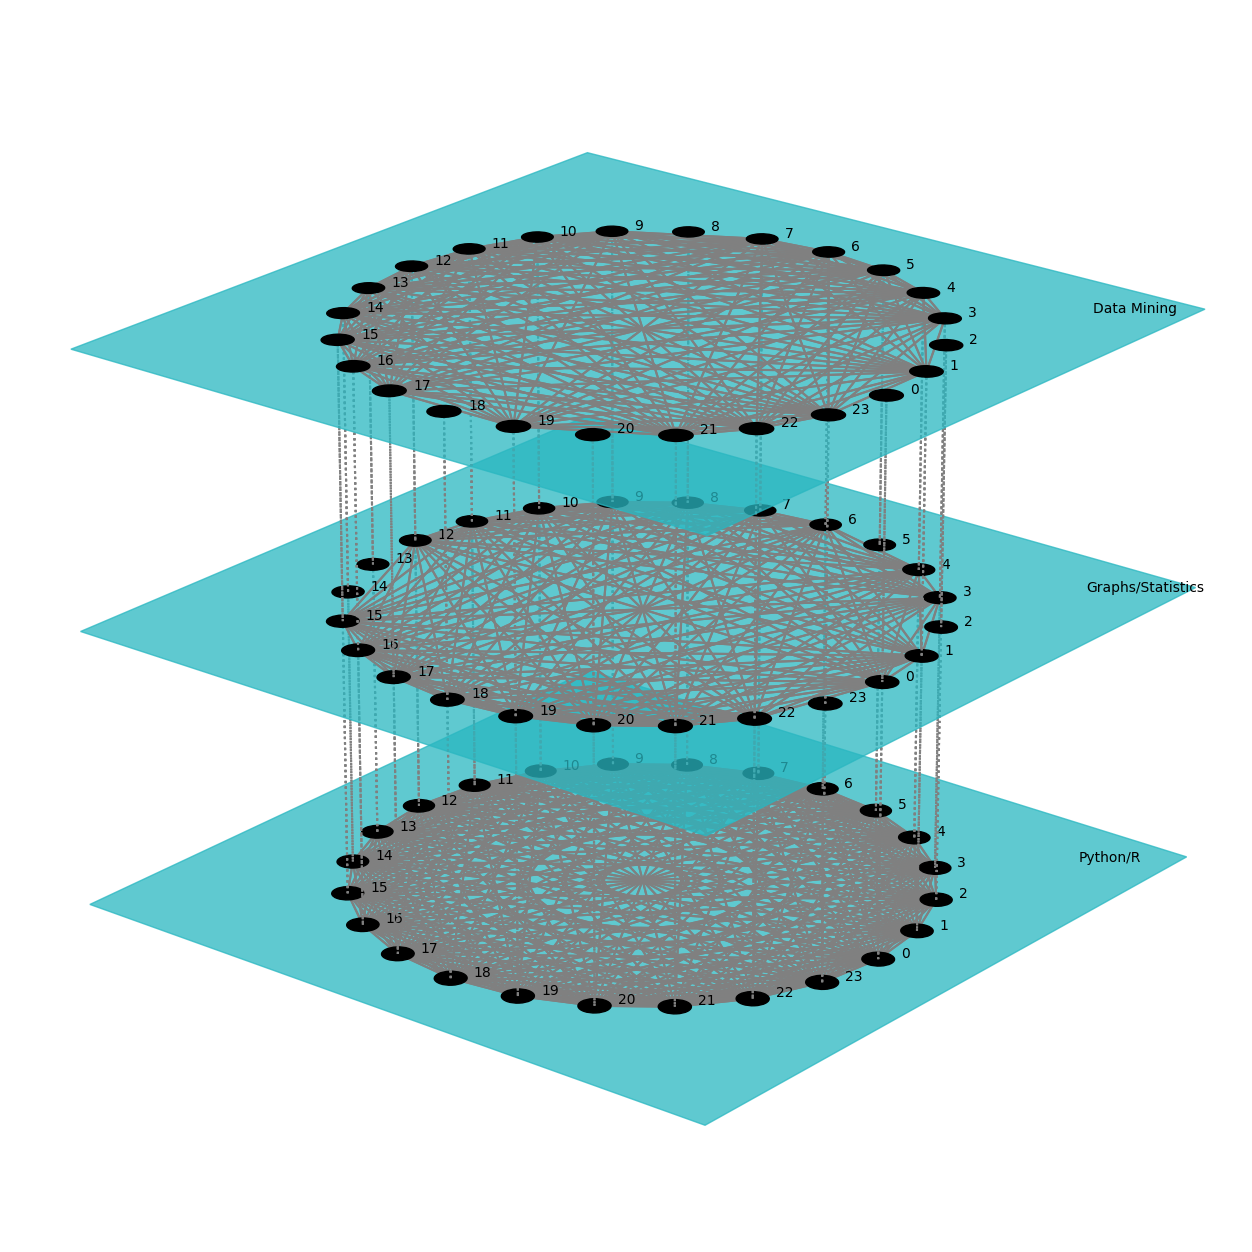

In [9]:
# Draw the network
fig_social = draw(net, layout="circular", layerPadding=0.3, defaultLayerLabelLoc=(0.9,0.9), figsize=(16,16))

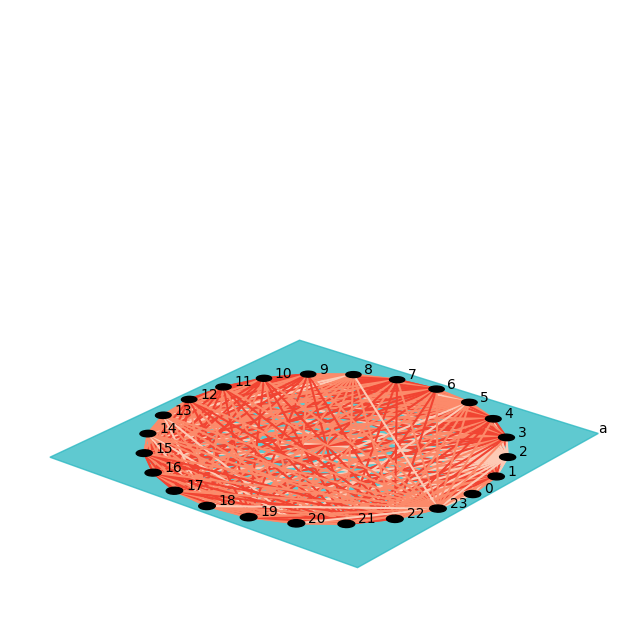

In [10]:
# Create a single-layer weighted network
single_layer_net = MultiplexNetwork(couplings="categorical", fullyInterconnected=False)

for i in range(24):
  for j in range(i+1,24):
    if data_numeric['Data Mining'][i] == 1 and data_numeric['Data Mining'][j] == 1:
      single_layer_net[i,j,'a'] = single_layer_net[i,j,'a'] + 1
    if data_numeric["Python/R"][i] == 1 and data_numeric["Python/R"][j] == 1:
      single_layer_net[i,j,'a'] = single_layer_net[i,j,'a'] + 1
    if data_numeric["Graphs/Statistics"][i] == 1 and data_numeric["Graphs/Statistics"][j] == 1:
      single_layer_net[i,j,'a'] = single_layer_net[i,j,'a'] + 1

# Visualize the single-layer weighted network
fig = draw(single_layer_net, layout="circular", figsize=(8,8), edgeColorRule={"rule":"edgeweight", "colormap":"Reds", "scaleby":0.2})

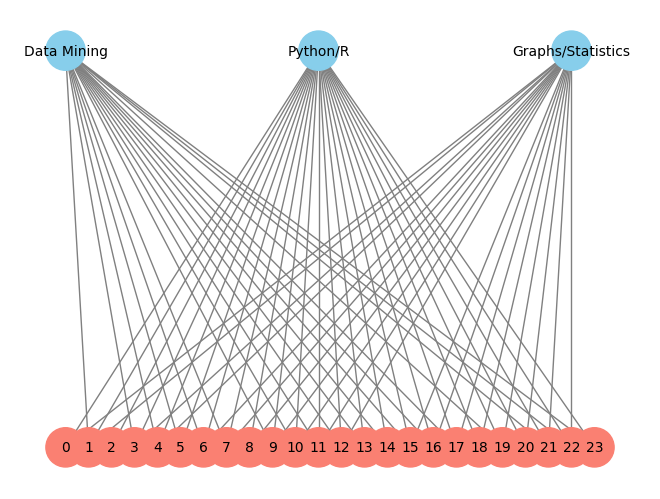

In [11]:
import networkx as nx
G = nx.Graph()

courses = ["Data Mining", "Python/R", "Graphs/Statistics"]
G.add_nodes_from(courses, group = 'Courses')

students = [i for i in range(24)]
G.add_nodes_from(students, group = 'Students')

for i in range(24):
  for course in courses:
    if data_numeric[course][i] == 1:
      G.add_edge(i,course)

pos = {}
for i, node in enumerate(courses):
    pos[node] = (11*i, 1)

for i, node in enumerate(students):
    pos[node] = (i, 0)

node_colors = ["skyblue" if G.nodes[node]["group"] == "Courses" else "salmon" for node in G.nodes]
fig = nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=800, font_size=10, edge_color='gray')

In [12]:
def analysis(G):

  # a) Size and diameter of the largest connected component
  largest_cc = max(nx.connected_components(G), key=len)
  subgraph = G.subgraph(largest_cc)
  size_lcc = subgraph.number_of_nodes()
  diameter_lcc = nx.diameter(subgraph) if nx.is_connected(subgraph) else float('inf')

  print(f"Size of largest connected component: {size_lcc}")
  print(f"Diameter of largest connected component: {diameter_lcc}")

  # b) Degree distribution
  degrees = [deg for _, deg in G.degree()]
  avg_degree = sum(degrees) / len(degrees)
  print(f"Average degree: {avg_degree}")

  # Plot degree distribution histogram
  plt.locator_params(integer=True)
  plt.xticks(range(0,24))
  plt.hist(degrees, edgecolor='black')
  plt.xlabel("Degree")
  plt.ylabel("Frequency")
  plt.title("Degree Distribution Histogram")
  plt.show()

  # c) Average path length
  if nx.is_connected(G):
      avg_path_length = nx.average_shortest_path_length(G)
      print(f"Average path length: {avg_path_length}")
  else:
      print("Graph is not connected.")

  # d) Average clustering coefficient
  avg_clustering = nx.average_clustering(G)
  print(f"Average clustering coefficient: {avg_clustering}")

Size of largest connected component: 19
Diameter of largest connected component: 1
Average degree: 14.25


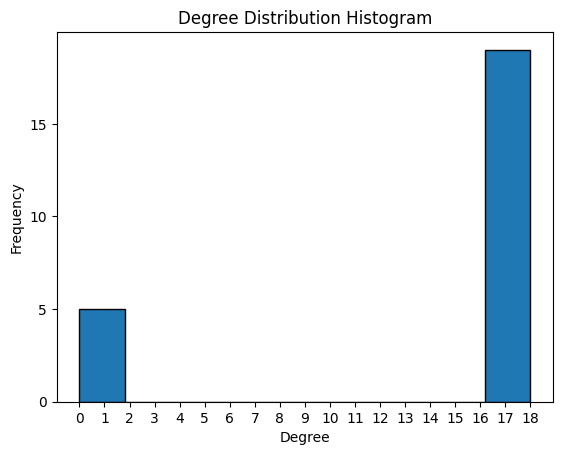

Graph is not connected.
Average clustering coefficient: 0.7916666666666666


In [13]:
import matplotlib.pyplot as plt

G = nx.Graph()

# Add students to each layer
for i in range(24):
  for layer in layers:
        G.add_node(i)

# Add edges
for i in range(24):
  for j in range(i+1,24):
    if data_numeric['Data Mining'][i] == 1 and data_numeric['Data Mining'][j] == 1:
      G.add_edge(i,j)

analysis(G)

Size of largest connected component: 24
Diameter of largest connected component: 1
Average degree: 23.0


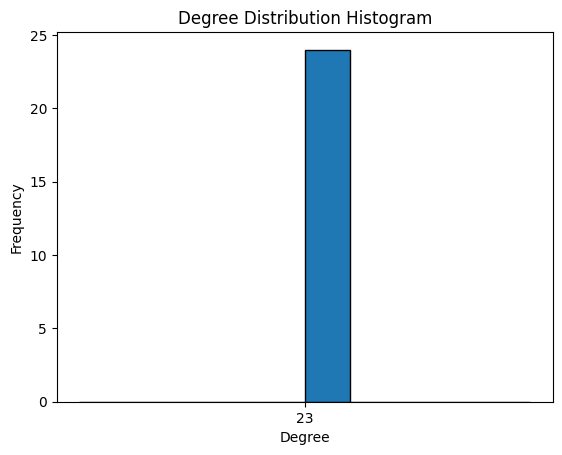

Average path length: 1.0
Average clustering coefficient: 1.0


In [14]:
G = nx.Graph()
# Add students to each layer
for i in range(24):
  for layer in layers:
        G.add_node(i)

for i in range(24):
  for j in range(i+1,24):
    if data_numeric["Python/R"][i] == 1 and data_numeric["Python/R"][j] == 1:
      G.add_edge(i,j)

analysis(G)

Size of largest connected component: 19
Diameter of largest connected component: 1
Average degree: 14.25


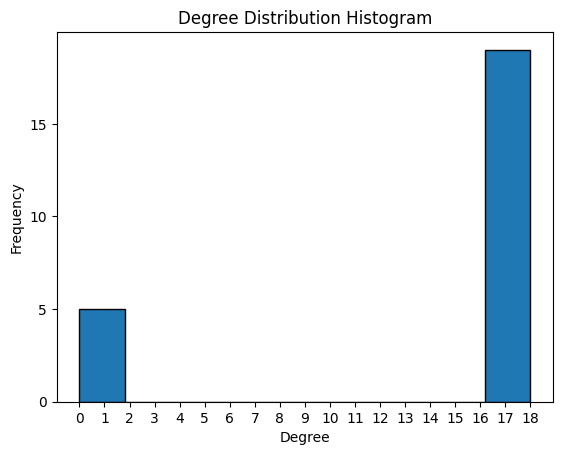

Graph is not connected.
Average clustering coefficient: 0.7916666666666666


In [15]:
G = nx.Graph()
# Add students to each layer
for i in range(24):
  for layer in layers:
        G.add_node(i)

for i in range(24):
  for j in range(i+1,24):
    if data_numeric["Graphs/Statistics"][i] == 1 and data_numeric["Graphs/Statistics"][j] == 1:
      G.add_edge(i,j)

analysis(G)

Size of largest connected component: 24
Diameter of largest connected component: 1
Average degree: 23.0


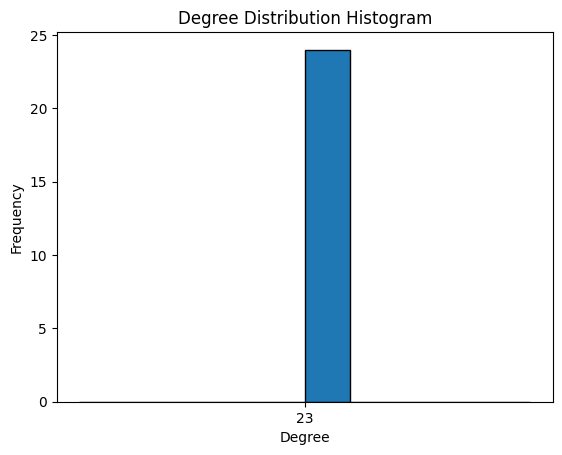

Average path length: 1.0
Average clustering coefficient: 1.0


In [16]:
G = nx.Graph()

# Add students to each layer
for i in range(24):
        G.add_node(i)

# Add edges
for i in range(24):
  for j in range(i+1,24):
    if data_numeric['Data Mining'][i] == 1 and data_numeric['Data Mining'][j] == 1:
      G.add_edge(i,j, weight = 1)
    if data_numeric["Python/R"][i] == 1 and data_numeric["Python/R"][j] == 1:
      if not G.has_edge(i,j):
        G.add_edge(i,j, weight = 1)
      G[i][j]['weight'] =+ 1
    if data_numeric["Graphs/Statistics"][i] == 1 and data_numeric["Graphs/Statistics"][j] == 1:
      if not G.has_edge(i,j):
        G.add_edge(i,j, weight = 1)
      G[i][j]['weight'] =+ 1

analysis(G)